Link:
Data - https://catalog.data.gov/dataset/crimes-one-year-prior-to-present
GitHub - https://github.com/LoydDely/Comp-3800-Data-Analytics

Main : How has crime trended in the city of Chicago?

What is the breakdown of crime by hour in the city of Chicago?



Which crime type occurs the most in Chicago?

What are the top 8 crime types with the most arrests?

**Result Analysis**

---



I have chosen a data set provided by the city of Chicago that details its crime statistics in a CSV spreadsheet. With an overwhelming amount of data and limited computing capabilities that would otherwise significantly affect the time to compute, I have limited the analysis of the Data between the dates of 2023-10-01 00:00:00 - 2023-10-2 23:59:00. Although this may seem like a narrow time frame it give a good view of 2 da y working time of what type of crime trends in the City of Chicago.

The first breakdown of Crime trends in the City of Chicago will begin with a review of its Occurred Crime Types—figure 1 displays all the crime types sorted by the most occurring crime type in the city. Understanding which type of crimes occur the most helps to understand the city's biggest problems. Theft and Battery far outpace any crime in the city and should be an objective to combat. Figure 2 displays theft per hour in the city. This graph helps establish where resources can be allocated to stem the rise of crime. The consistent rate of crime begins to rise around 9 am when people are out and about and falls drastically before 23:00

Although the data in Figure 2 is useful, there is an issue of 00:00 hours, with most thefts occurring within that time frame. The conclusion is that 00:00 is the default time set by the city's RMS. Studying the rise and fall of thefts through the day based on the chart would suggest that theft would continue to fall into the 00:00 hours, but instead, they drastically rise. This 00:00-hour count of thefts goes against the city's trend of thefts per hour.

Figure 1

(1688, 4)

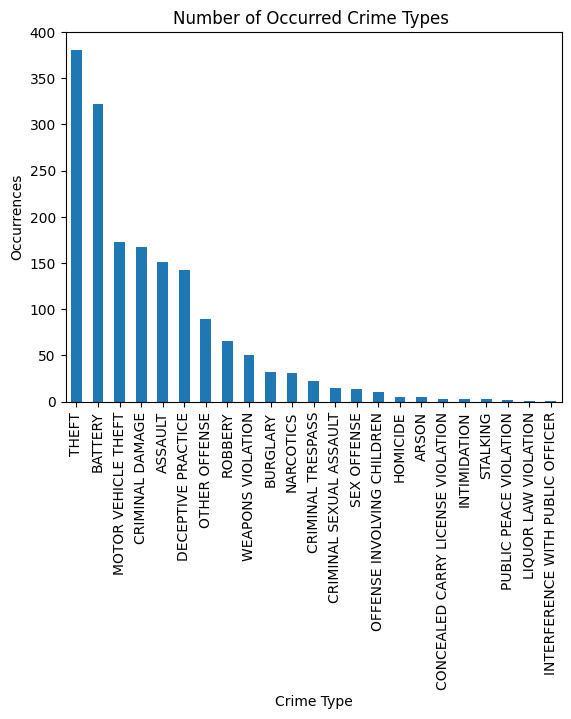

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_csv('Crimes_-_One_year_prior_to_present.csv',usecols=["CASE#","DATE  OF OCCURRENCE"," PRIMARY DESCRIPTION","WARD"])
df.dropna(inplace=True)
df.drop_duplicates(subset=["CASE#"])
df["DATE  OF OCCURRENCE"] = pd.to_datetime(df["DATE  OF OCCURRENCE"])
df= df[(df["DATE  OF OCCURRENCE"] >= "2023-10-01 00:00:00") & (df["DATE  OF OCCURRENCE"] <= "2023-10-2 23:59:00")]
df[" PRIMARY DESCRIPTION"].value_counts(sort=True).plot.bar()
plt.title("Number of Occurred Crime Types ")
plt.xlabel("Crime Type")
plt.ylabel("Occurrences")
df.shape

Figure 2


<ipython-input-119-2344b165baba>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Hour"] = df["DATE  OF OCCURRENCE"].dt.hour


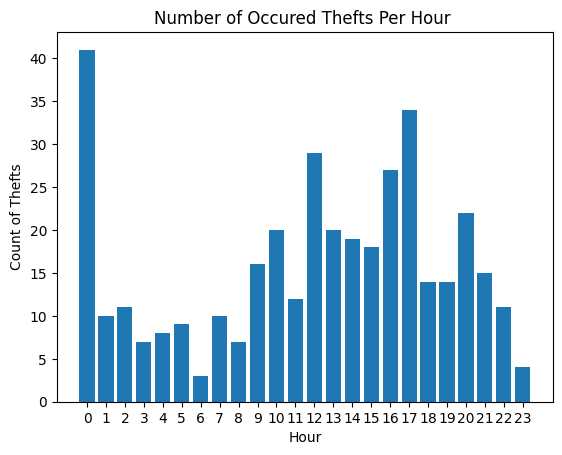

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_csv('Crimes_-_One_year_prior_to_present.csv',usecols=["CASE#","DATE  OF OCCURRENCE"," PRIMARY DESCRIPTION","WARD"])
df.dropna(inplace=True)
df.drop_duplicates(subset=["CASE#"])
df["DATE  OF OCCURRENCE"] = pd.to_datetime(df["DATE  OF OCCURRENCE"])
df= df[(df["DATE  OF OCCURRENCE"] >= "2023-10-01 00:00:00") & (df["DATE  OF OCCURRENCE"] <= "2023-10-2 23:59:00")]
df["Hour"] = df["DATE  OF OCCURRENCE"].dt.hour
df = df[df[" PRIMARY DESCRIPTION"]=='THEFT']
df = df.groupby([' PRIMARY DESCRIPTION', 'Hour']).size().reset_index(name='Count')
x = df.iloc[:, 1]
y = df.iloc[:, 2]
plt.bar(x,y)
plt.title("Number of Occured Thefts Per Hour ")
plt.xlabel("Hour")
plt.ylabel("Count of Thefts")
plt.xticks(np.arange(0,24,1))
plt.show()

Figure 3

Figure 3 shows an overall trend of Crime per hour throughout the city. While Figure 2 displays only theft per hour, Figure 3 shows all Crime throughout the city per hour. When un-filtering only for thefts, overall, Crime in the city follows the same pattern. This continues the trend of Crime following the movement of people, and Crime rises as people begin their days by traveling, shopping, working, and so much more. The same outliers are visible in Figure 2. According to Figure 3, overall Crime begins to rise around 09:00 hours and decreases around 23:00 hours. Visualizing the data would justify the need for extra personnel to handle the extra Crime during the day.

(1688, 4)

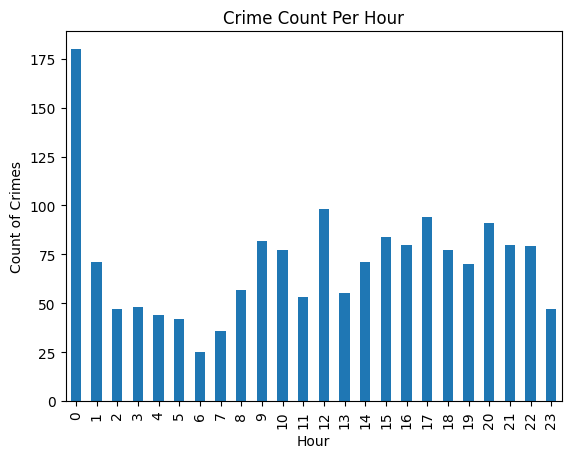

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_csv('Crimes_-_One_year_prior_to_present.csv',usecols=["CASE#","DATE  OF OCCURRENCE"," PRIMARY DESCRIPTION","WARD"])
df.dropna(inplace=True)
df.drop_duplicates(subset=["CASE#"])
df["DATE  OF OCCURRENCE"] = pd.to_datetime(df["DATE  OF OCCURRENCE"])
df= df[(df["DATE  OF OCCURRENCE"] >= "2023-10-01 00:00:00") & (df["DATE  OF OCCURRENCE"] <= "2023-10-2 23:59:00")]
sr = pd.Series(df["DATE  OF OCCURRENCE"])
sr = pd.to_datetime(sr)
result = sr.dt.hour
result.sort_values().value_counts(sort=False).plot.bar()
plt.title("Crime Count Per Hour")
plt.xlabel("Hour")
plt.ylabel("Count of Crimes")
df.shape

Figure 4

The final analysis of this data will involve a review of arrest statistics by crime type. Reviewing Figure 4 detracts from the trend of thefts being the city’s most significant issue rather than Battery offenses being the most prominent issue. Comparing the arrest data of Figures 4 and 5 suggests that it is more challenging to arrest for a theft versus a battery offense. Looking at Arrest statistics alone suggests that battery offenses are the issue, but combining the crime types, arrests, and time creates a bigger picture that overall, Thefts are an enormous problem for the city, but they will be difficult to stem.

(1688, 5)
    PRIMARY DESCRIPTION ARREST  Count
18                THEFT      N    363
2               BATTERY      N    269
10  MOTOR VEHICLE THEFT      N    170
4       CRIMINAL DAMAGE      N    163
7    DECEPTIVE PRACTICE      N    141
1               ASSAULT      N    134
13        OTHER OFFENSE      N     78
15              ROBBERY      N     64


Text(0.5, 1.0, 'Top 8 Crime Types by Non - Arrests')

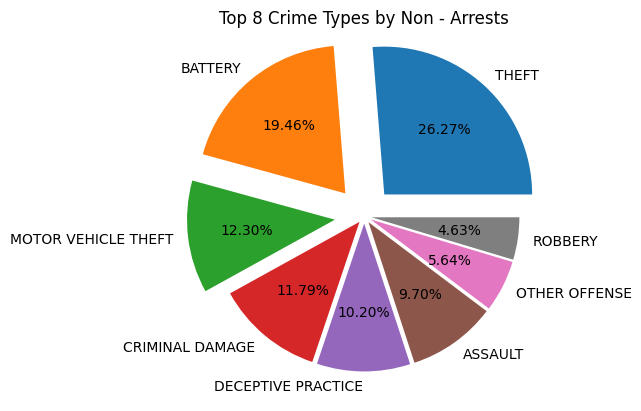

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_csv('Crimes_-_One_year_prior_to_present.csv',usecols=["CASE#","DATE  OF OCCURRENCE"," PRIMARY DESCRIPTION","WARD","ARREST"])
df.dropna(inplace=True)
df.drop_duplicates(subset=["CASE#"])
df["DATE  OF OCCURRENCE"] = pd.to_datetime(df["DATE  OF OCCURRENCE"])
df= df[(df["DATE  OF OCCURRENCE"] >= "2023-10-01 00:00:00") & (df["DATE  OF OCCURRENCE"] <= "2023-10-2 23:59:00")]
print(df.shape)
df = df[df["ARREST"]=='N']
df = df.groupby([' PRIMARY DESCRIPTION', 'ARREST']).size().reset_index(name='Count')
df = df.sort_values(by="Count",ascending=False).head(8)
print(df)
plt.pie(df.iloc[:, 2], labels=df.iloc[:, 0], autopct="%.2f%%", explode=[0.2,0.2,0.2,0.05,0.05,0.05,0.05,0.05])
plt.title("Top 8 Crime Types by Non - Arrests")

Figure 5

(1688, 5)


Text(0.5, 1.0, 'Top 8 Crime Types by Arrests')

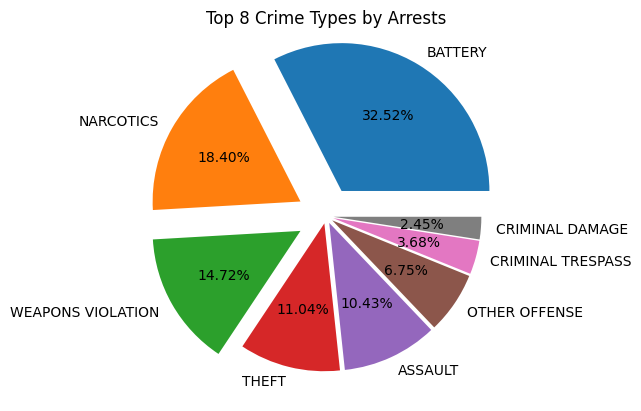

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_csv('Crimes_-_One_year_prior_to_present.csv',usecols=["CASE#","DATE  OF OCCURRENCE"," PRIMARY DESCRIPTION","WARD","ARREST"])
df.dropna(inplace=True)
df.drop_duplicates(subset=["CASE#"])
df["DATE  OF OCCURRENCE"] = pd.to_datetime(df["DATE  OF OCCURRENCE"])
df= df[(df["DATE  OF OCCURRENCE"] >= "2023-10-01 00:00:00") & (df["DATE  OF OCCURRENCE"] <= "2023-10-2 23:59:00")]
print(df.shape)
df = df[df["ARREST"]=='Y']
df = df.groupby([' PRIMARY DESCRIPTION', 'ARREST']).size().reset_index(name='Count')
df = df.sort_values(by="Count",ascending=False).head(8)
plt.pie(df.iloc[:, 2], labels=df.iloc[:, 0], autopct="%.2f%%", explode=[0.2,0.2,0.2,0.05,0.05,0.05,0.05,0.05])
plt.title("Top 8 Crime Types by Arrests")

While this data set contained a vast amount of data, details of the data were still somewhat limited to the set itself. To further explore Crime in Chicago, data such as population, demographics, and socioeconomic status of the city's wards would create a clearer picture. Including these additional data sets helps better understand what causes these high crime rates and how to address and combat these issues, such as utilizing community policing.  